In [69]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('/content/disease_symptom_dataset.csv')

## Датасет

In [89]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Hypertensive Heart Disease,No,No,Yes,No,30,Female,High,High,Positive
1,Myocardial Infarction (Heart...,Yes,Yes,Yes,Yes,30,Female,High,High,Positive
2,Atherosclerosis,No,No,Yes,No,35,Male,Normal,Normal,Negative
3,Hypertension,Yes,Yes,Yes,No,35,Female,High,Normal,Negative
4,Coronary Artery Disease,No,No,Yes,No,40,Female,High,High,Positive
5,Hypertension,Yes,No,Yes,No,45,Male,Normal,High,Positive
6,Hypertension,No,No,No,No,48,Female,Low,High,Negative
7,Hypertension,No,Yes,No,No,50,Female,Normal,Low,Negative
8,Hypertension,Yes,Yes,No,No,52,Male,Normal,Low,Negative
9,Hypertension,No,Yes,No,No,55,Female,Normal,Low,Negative


In [72]:
df.shape

(18, 10)

In [73]:
len(df['Disease'].unique())

5

In [74]:
df.describe(include='all')

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
count,18,18,18,18,18,18.000000,18,18,18,18
unique,5,2,2,2,2,NaN,2,3,3,2
top,Hypertension,No,No,Yes,No,NaN,Female,High,High,Positive
freq,10,10,11,11,17,NaN,11,10,8,10
mean,NaN,NaN,NaN,NaN,NaN,49.166667,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,10.766233,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,41.250000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,53.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,58.750000,NaN,NaN,NaN,NaN


По таблице можно сделать вывод, что ошибочных данных нет как и выбросов

## Пропущенные значения

In [75]:
print(f"Есть ли пропущенные значения: {df.isnull().values.any()}")

Есть ли пропущенные значения: False


## Исследования датасета

In [76]:
df['Gender'].value_counts()

,count
Gender,
Female,11
Male,7


In [77]:
df['Blood Pressure'].value_counts()

,count
Blood Pressure,
High,10
Normal,7
Low,1


In [78]:
df['Blood Pressure'].value_counts()

,count
Blood Pressure,
High,10
Normal,7
Low,1


In [79]:
df['Disease'].value_counts()

,count
Disease,
Hypertension,10
Coronary Artery Disease,5
Hypertensive Heart Disease,1
Myocardial Infarction (Heart...,1
Atherosclerosis,1


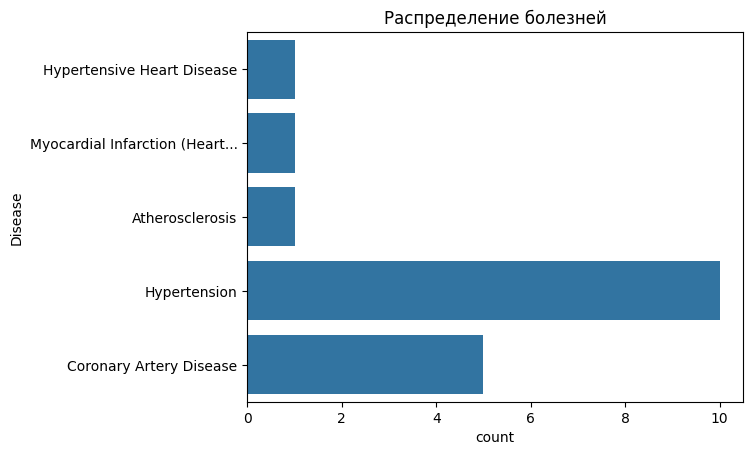

In [80]:
sns.countplot(y='Disease', data=df)
plt.title('Распределение болезней')
plt.show()

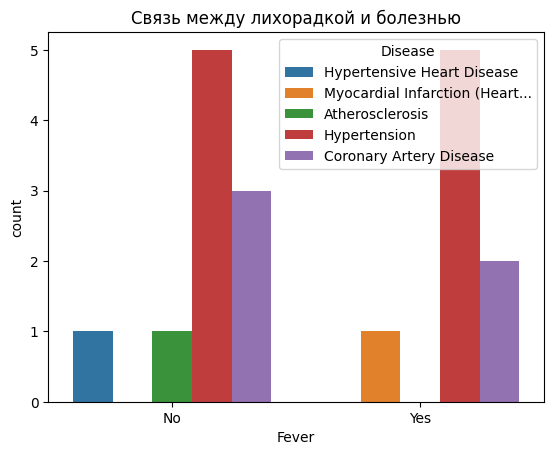

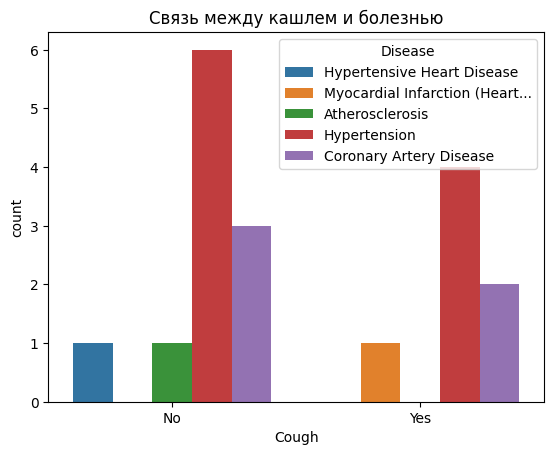

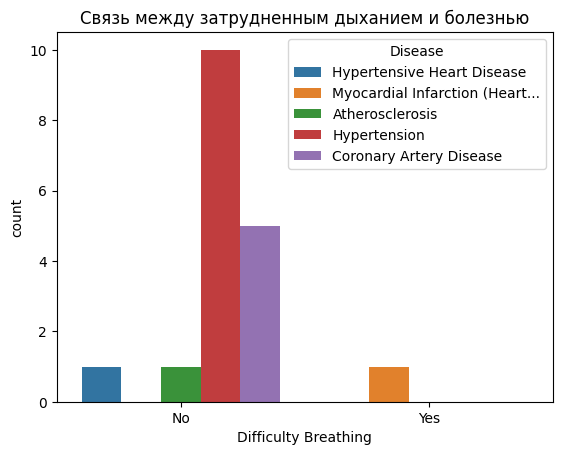

In [36]:
sns.countplot(x='Fever', hue='Disease', data=df)
plt.title('Связь между лихорадкой и болезнью')
plt.show()

sns.countplot(x='Cough', hue='Disease', data=df)
plt.title('Связь между кашлем и болезнью')
plt.show()

sns.countplot(x='Difficulty Breathing', hue='Disease', data=df)
plt.title('Связь между затрудненным дыханием и болезнью')
plt.show()

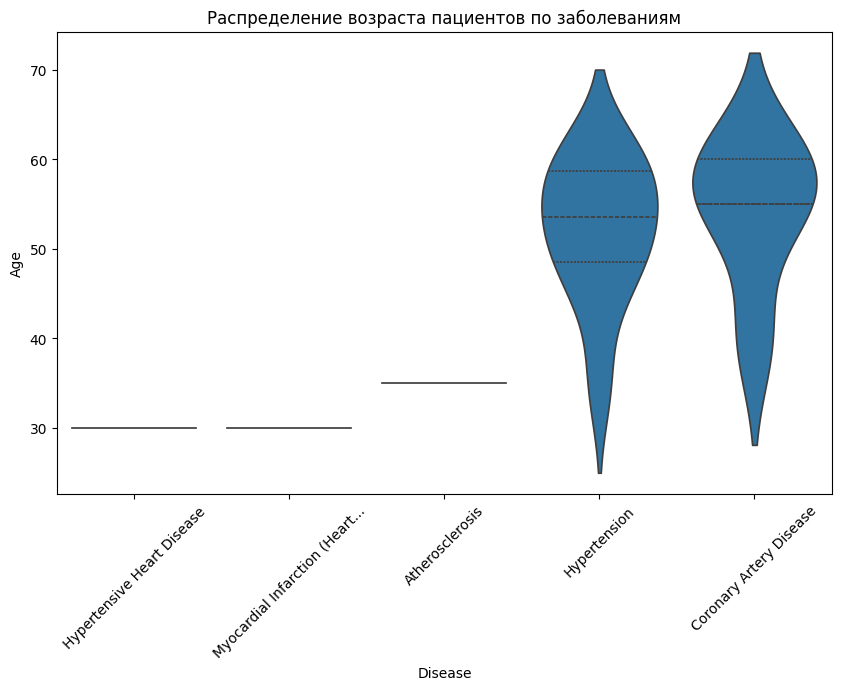

In [90]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Disease', y='Age', data=df, inner='quartile')
plt.title('Распределение возраста пациентов по заболеваниям')
plt.xticks(rotation=45)
plt.show()

In [91]:
df_copy = df.copy()

In [92]:
df_copy['Fever'] = df['Fever'].map({'Yes': 1, 'No': 0})
df_copy['Cough'] = df['Cough'].map({'Yes': 1, 'No': 0})
df_copy['Fatigue'] = df['Fatigue'].map({'Yes': 1, 'No': 0})
df_copy['Difficulty Breathing'] = df['Difficulty Breathing'].map({'Yes': 1, 'No': 0})
df_copy['Outcome Variable'] = df['Outcome Variable'].map({'Positive': 1, 'Negative': 0})

In [93]:
df_copy.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Hypertensive Heart Disease,0,0,1,0,30,Female,High,High,1
1,Myocardial Infarction (Heart...,1,1,1,1,30,Female,High,High,1
2,Atherosclerosis,0,0,1,0,35,Male,Normal,Normal,0
3,Hypertension,1,1,1,0,35,Female,High,Normal,0
4,Coronary Artery Disease,0,0,1,0,40,Female,High,High,1


In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_copy['Blood Pressure_encoded'] = le.fit_transform(df['Blood Pressure'])
df_copy['Cholesterol Level_encoded'] = le.fit_transform(df['Cholesterol Level'])
df_copy['Gender_encoded'] = le.fit_transform(df['Gender'])

In [95]:
df_copy.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Blood Pressure_encoded,Cholesterol Level_encoded,Gender_encoded
0,Hypertensive Heart Disease,0,0,1,0,30,Female,High,High,1,0,0,0
1,Myocardial Infarction (Heart...,1,1,1,1,30,Female,High,High,1,0,0,0
2,Atherosclerosis,0,0,1,0,35,Male,Normal,Normal,0,2,2,1
3,Hypertension,1,1,1,0,35,Female,High,Normal,0,0,2,0
4,Coronary Artery Disease,0,0,1,0,40,Female,High,High,1,0,0,0


In [96]:
df_copy = df_copy.drop(columns=['Blood Pressure', 'Cholesterol Level', 'Gender'])

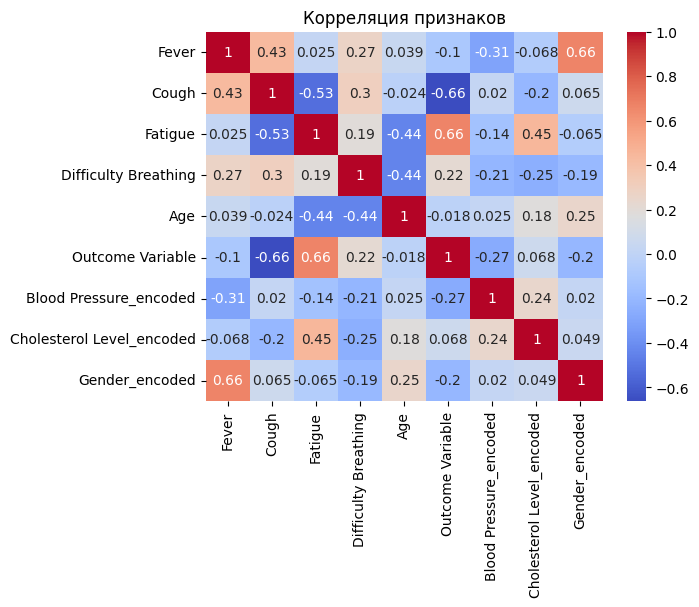

In [97]:
# Корреляционная матрица
corr = df_copy.drop('Disease', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()

Логично, что при усталости организм скорее всего болен). А так датасет очень маленький.

In [101]:
df_encoded = pd.get_dummies(df, columns=['Blood Pressure', 'Cholesterol Level', 'Gender'])

In [102]:
df_encoded

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Outcome Variable,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal,Gender_Female,Gender_Male
0,Hypertensive Heart Disease,No,No,Yes,No,30,Positive,True,False,False,True,False,False,True,False
1,Myocardial Infarction (Heart...,Yes,Yes,Yes,Yes,30,Positive,True,False,False,True,False,False,True,False
2,Atherosclerosis,No,No,Yes,No,35,Negative,False,False,True,False,False,True,False,True
3,Hypertension,Yes,Yes,Yes,No,35,Negative,True,False,False,False,False,True,True,False
4,Coronary Artery Disease,No,No,Yes,No,40,Positive,True,False,False,True,False,False,True,False
5,Hypertension,Yes,No,Yes,No,45,Positive,False,False,True,True,False,False,False,True
6,Hypertension,No,No,No,No,48,Negative,False,True,False,True,False,False,True,False
7,Hypertension,No,Yes,No,No,50,Negative,False,False,True,False,True,False,True,False
8,Hypertension,Yes,Yes,No,No,52,Negative,False,False,True,False,True,False,False,True
9,Hypertension,No,Yes,No,No,55,Negative,False,False,True,False,True,False,True,False


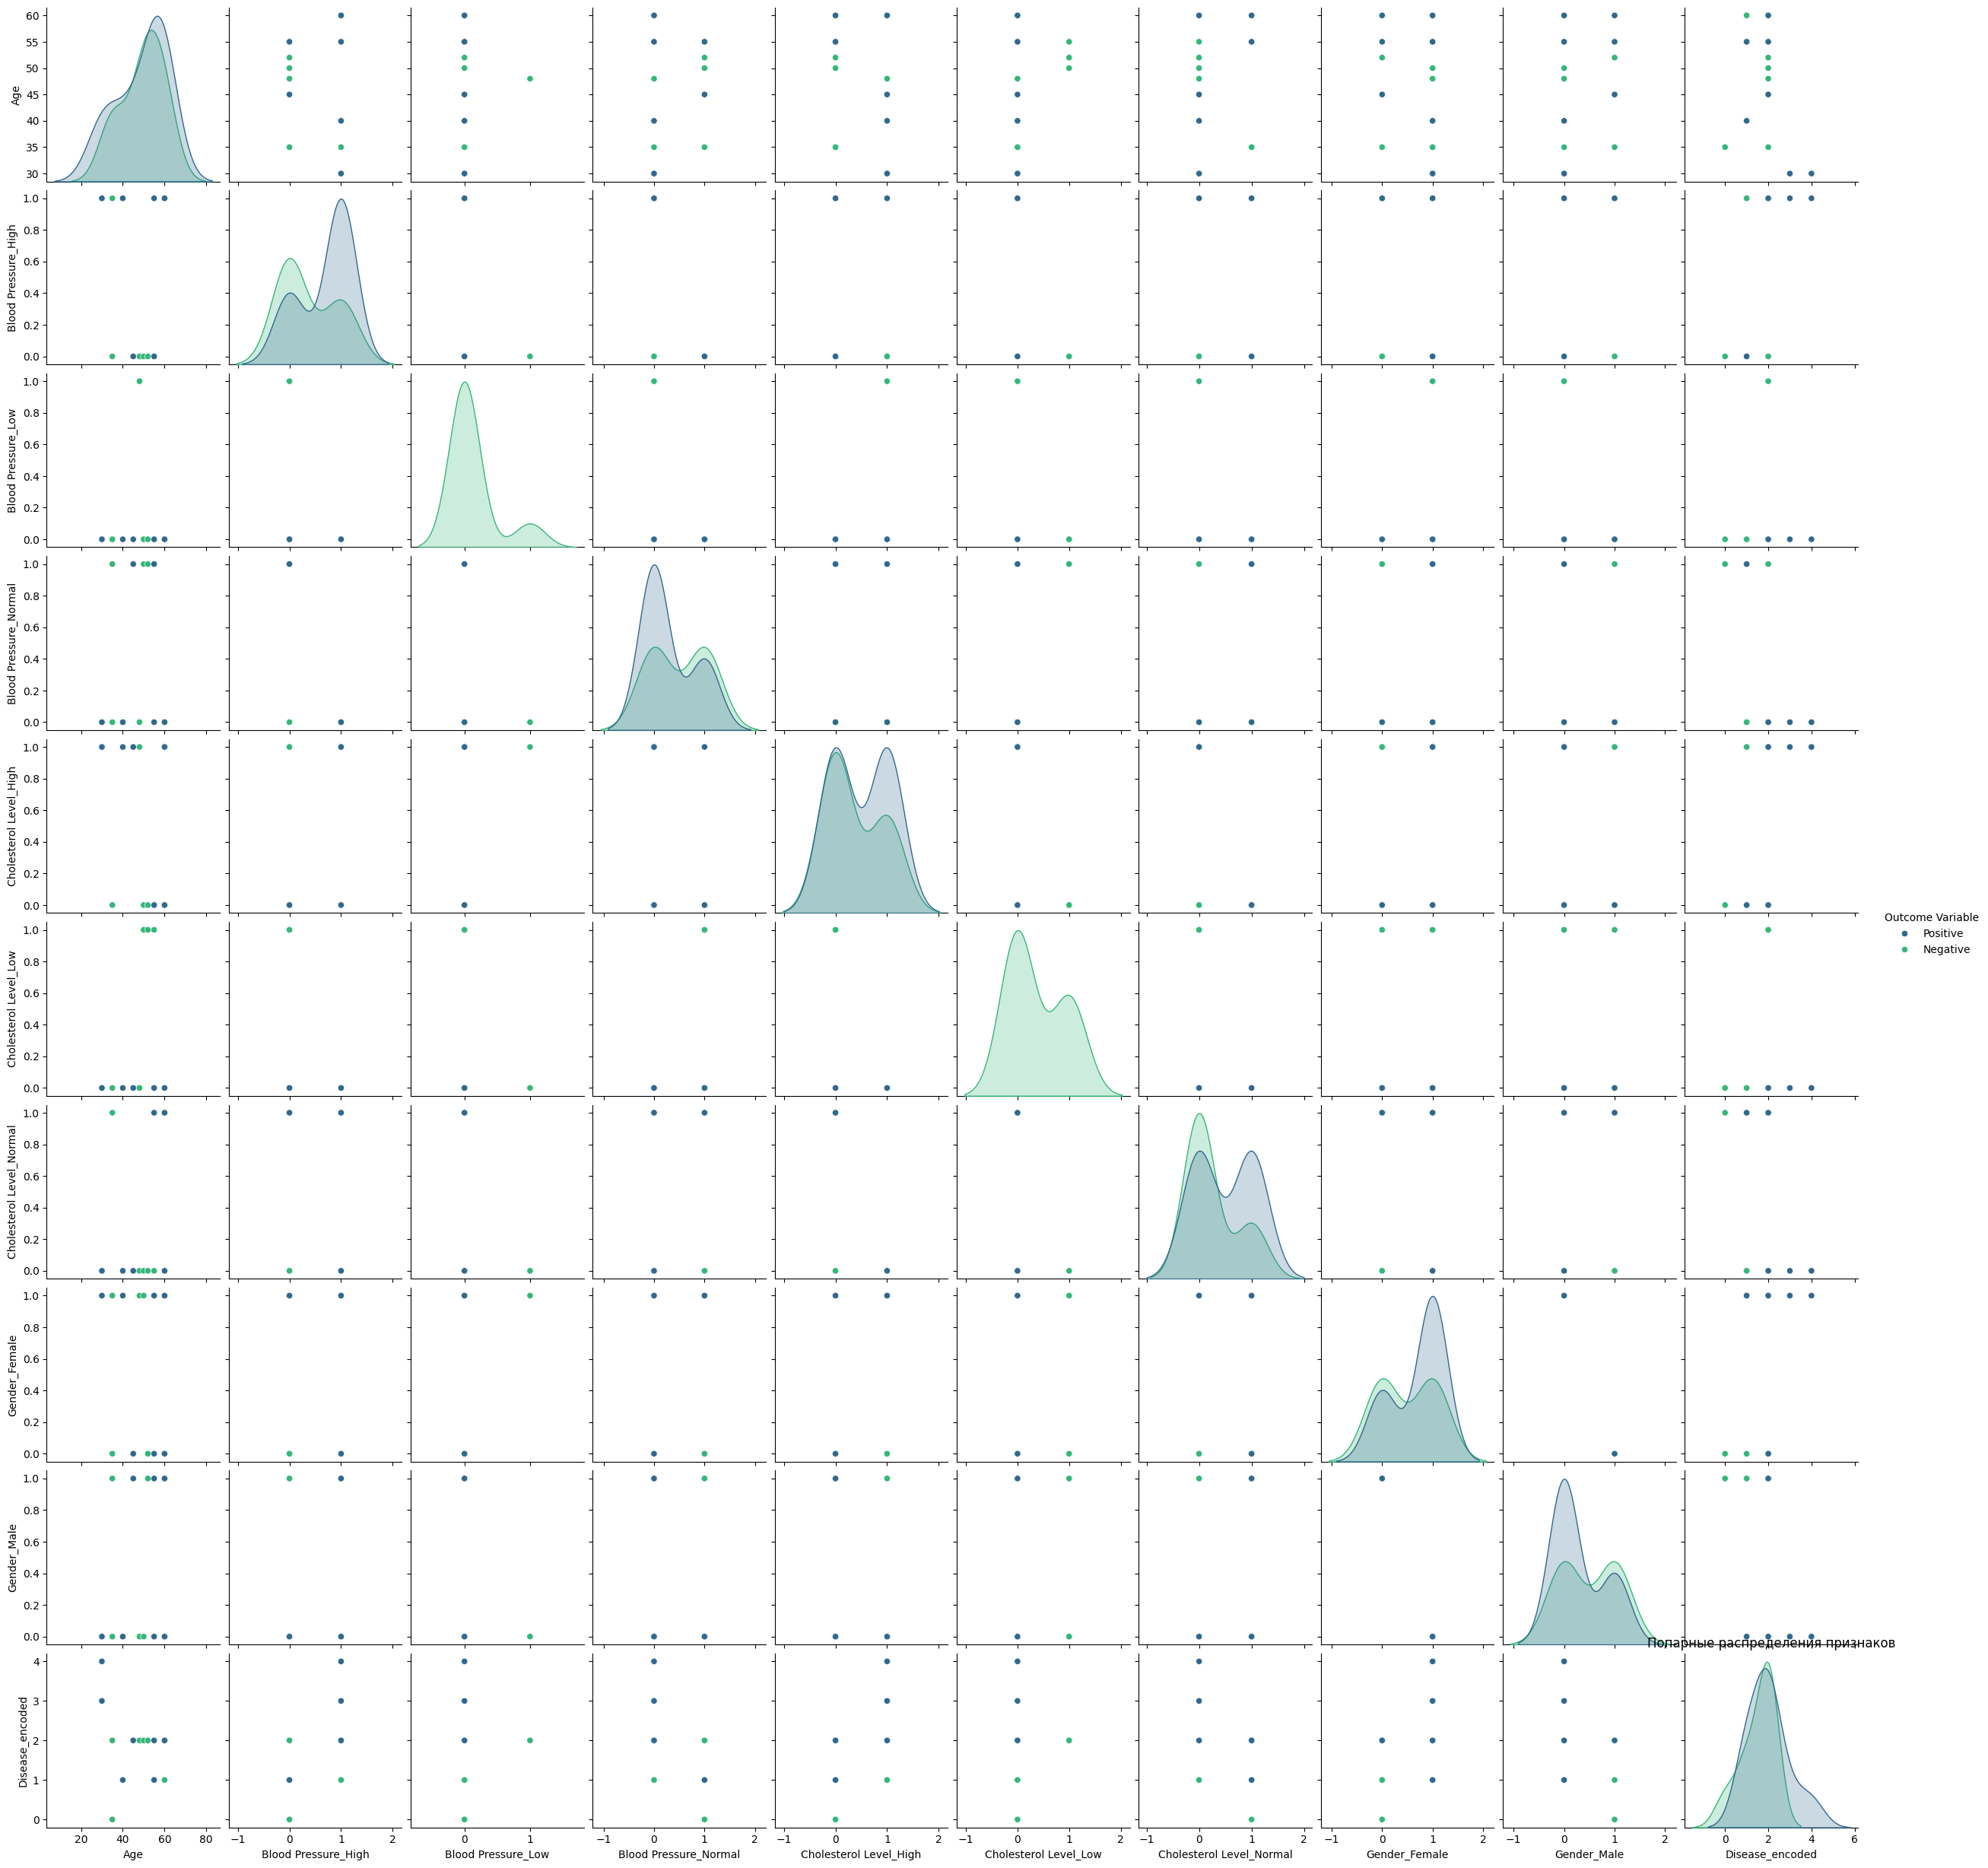

In [104]:
# Построение pairplot

df_encoded['Disease_encoded'] = df['Disease'].astype('category').cat.codes

sns.pairplot(df_encoded, hue='Outcome Variable', palette='viridis')
plt.title('Попарные распределения признаков')
plt.show()